In [18]:
# importing required packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from upsetplot import UpSet
from upsetplot import from_contents
from matplotlib.lines import Line2D

In [229]:
# Hub Genes
tnbc_up = pd.read_csv("tnbc_up.csv")
tnbc_up = set(tnbc_up["symbol"])
print(len(tnbc_up))

tnbc_down = pd.read_csv("tnbc_down.csv")
tnbc_down = set(tnbc_down["symbol"])
print(len(tnbc_down))

bl1_up = pd.read_csv("bl1_up.csv")
bl1_up = set(bl1_up["symbol"])
print(len(bl1_up))      

bl1_down = pd.read_csv("bl1_down.csv")
bl1_down = set(bl1_down["symbol"])
print(len(bl1_down))
      
bl2_up = pd.read_csv("bl2_up.csv")
bl2_up = set(bl2_up["symbol"])
print(len(bl2_up))
      
bl2_down = pd.read_csv("bl2_down.csv")
bl2_down = set(bl2_down["symbol"])
print(len(bl2_down))
      
m_up = pd.read_csv("m_up.csv")
m_up = set(m_up["symbol"])
print(len(m_up))      

m_down = pd.read_csv("m_down.csv")
m_down = set(m_down["symbol"])
print(len(m_down))      

lar_up = pd.read_csv("lar_up.csv")
lar_up = set(lar_up["symbol"])
print(len(lar_up))      
                
lar_down = pd.read_csv("lar_down.csv")
lar_down = set(lar_down["symbol"])
print(len(lar_down))      

535
51
664
75
581
34
461
28
449
48


In [230]:
# Hub Gene Sets
bl1_up_only = bl1_up - ((bl2_up | m_up) | lar_up)
print(len(bl1_up_only))
bl2_up_only = bl2_up - ((bl1_up | m_up) | lar_up)
print(len(bl2_up_only))
m_up_only = m_up - ((bl1_up | bl2_up) | lar_up)
print(len(m_up_only))
lar_up_only = lar_up - ((bl1_up | bl2_up) | m_up)
print(len(lar_up_only))
common_up_in_all = (((bl1_up & bl2_up) & m_up) & lar_up)
print(len(common_up_in_all))

bl1_down_only = bl1_down - ((bl2_down | m_down) | lar_down)
print(len(bl1_down_only))
bl2_down_only = bl2_down - ((bl1_down | m_down) | lar_down)
print(len(bl2_down_only))
m_down_only = m_down - ((bl1_down | bl2_down) | lar_down)
print(len(m_down_only))
lar_down_only = lar_down - ((bl1_down | bl2_down) | m_down)
print(len(lar_down_only))
common_down_in_all = (((bl1_down & bl2_down) & m_down) & lar_down)
print(len(common_down_in_all))

103
90
21
15
284
23
7
5
19
9


In [231]:
# Preparing Upregulated Hub Genes for UpSet plot
upregulated = from_contents({"BL1": bl1_up, "BL2": bl2_up, "M": m_up, "LAR": lar_up})
upregulated

id
BL1   BL2   M     LAR            
True  True  False False     CXCL5
                  True       OAS2
            True  True       CDK2
                  True      H2AFZ
                  True   TIMELESS
...                           ...
False False False True       MUC6
                  True      H2AFJ
                  True     SNRPD2
                  True      TBX21
                  True      MUC16

[844 rows x 1 columns]

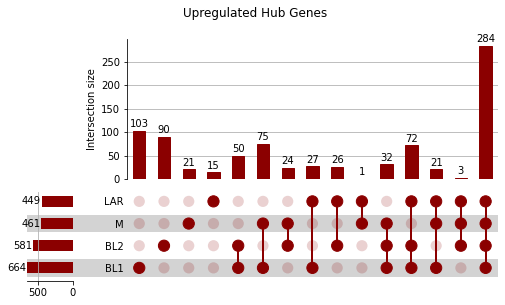

In [232]:
# UpSet plot for Upregulated Hub Genes
upregulated_upset = UpSet(upregulated, subset_size="count",
                          show_counts=True, facecolor="darkred", shading_color="lightgray").plot() 
plt.suptitle("Upregulated Hub Genes")
plt.savefig("upregulated_upset.pdf")

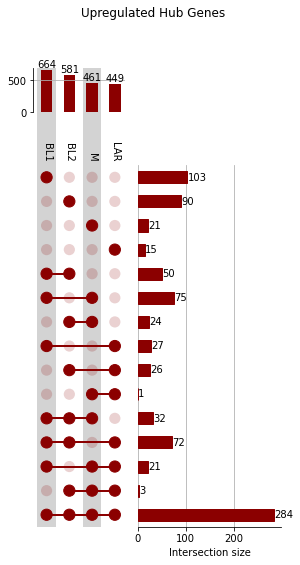

In [233]:
# UpSet vertical plot for Upregulated Hub Genes
upregulate_upset_vertical = UpSet(upregulated, subset_size="count", orientation='vertical',
                                  show_counts=True, facecolor="darkred", shading_color="lightgray").plot()
plt.suptitle("Upregulated Hub Genes")
plt.savefig("upregulated_vertical_upset.pdf") 

In [234]:
# Preparing Downregulated Hub Genes for UpSet plot
downregulated = from_contents({"BL1": bl1_down, "BL2": bl2_down, "M": m_down, "LAR": lar_down})
downregulated

id
BL1   BL2   M     LAR           
True  False False True      PAK3
      True  True  False    EPHX2
            False False  ALDH1A2
            True  False     PECR
      False False True     SPON1
...                          ...
False False False True      CAV3
                  True      NID1
                  True      PGM5
                  True      SGCD
                  True     LAMB3

[106 rows x 1 columns]

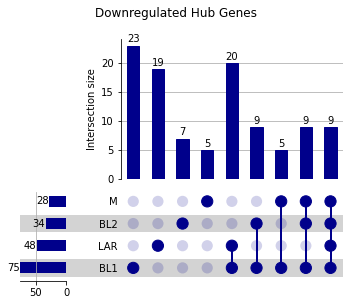

In [235]:
# UpSet plot for Downregulated Hub Genes
downregulated_upset = UpSet(downregulated, subset_size="count",
                          show_counts=True, facecolor="darkblue", shading_color="lightgray").plot() 
plt.suptitle("Downregulated Hub Genes")
plt.savefig("downregulated_upset.pdf")

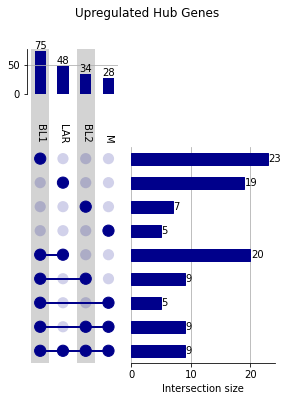

In [236]:
# UpSet vertical plot for Upregulated Hub Genes
downregulated_upset_vertical = UpSet(downregulated, subset_size="count", orientation='vertical',
                                  show_counts=True, facecolor="darkblue", shading_color="lightgray").plot()
plt.suptitle("Upregulated Hub Genes")
plt.savefig("downregulated_vertical_upset.pdf")

In [237]:
# DEGs
tnbc = pd.read_csv("sigs.csv")
tnbc = set(tnbc["ensembl_gene_id"])
print(len(tnbc))

bl1 = pd.read_csv("BL1_sigs.csv")
bl1 = set(bl1["ensembl_gene_id"])
print(len(bl1))

bl2 = pd.read_csv("BL2_sigs.csv")
bl2 = set(bl2["ensembl_gene_id"])
print(len(bl2))

m = pd.read_csv("M_sigs.csv")
m = set(m["ensembl_gene_id"])
print(len(m))

lar = pd.read_csv("LAR_sigs.csv")
lar = set(lar["ensembl_gene_id"])
print(len(lar))

8227
9669
8462
8719
7453


In [238]:
# DEG sets
bl1_only = bl1 - ((bl2 | m) | lar)
bl2_only = bl2 - ((bl1 | m) | lar)
m_only = m - ((bl1 | bl2) | lar)
lar_only = lar - ((bl1 | bl2) | m)
common_in_all = (((bl1 & bl2) & m) & lar)
print(len(bl1_only))
print(len(bl2_only))
print(len(m_only))
print(len(lar_only))
print(len(common_in_all))

1063
935
1439
603
3960


In [239]:
# Preparing DEGs for UpSet plot
degs = from_contents({"BL1": bl1, "BL2": bl2, "M": m, "LAR": lar})
degs

id
BL1   BL2   M     LAR                   
True  False True  False  ENSG00000182580
      True  True  True   ENSG00000165092
                  False              NaN
                  True   ENSG00000104524
                  True   ENSG00000108479
...                                  ...
False False False True   ENSG00000135862
                  True   ENSG00000276566
                  True   ENSG00000119614
                  True   ENSG00000132357
                  True   ENSG00000233626

[13816 rows x 1 columns]

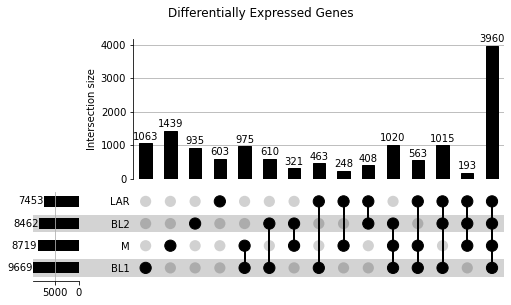

In [240]:
# UpSet plot for DEGs
degs_upset = UpSet(degs, subset_size="count",
                          show_counts=True, shading_color="lightgray").plot() 
plt.suptitle("Differentially Expressed Genes")
plt.savefig("degs_upset.pdf")

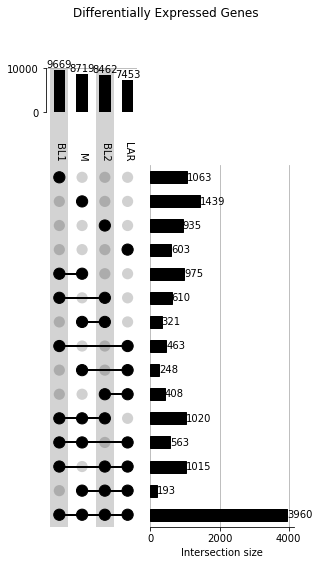

In [241]:
# UpSet vertical plot for DEGs
degs_upset = UpSet(degs, subset_size="count", orientation='vertical',
                          show_counts=True, shading_color="lightgray").plot() 
plt.suptitle("Differentially Expressed Genes")
plt.savefig("degs_vertial_upset.pdf")

In [242]:
# Volcano Plot for TNBC
tnbc_df = pd.read_csv("sigs.csv")
tnbc_df["nlog10"] = -np.log10(tnbc_df.padj)
tnbc_df.head()

,ensembl_gene_id,external_gene_name,gene_biotype,chromosome_name,start_position,end_position,baseMean,log2FoldChange,lfcSE,pvalue,padj,nlog10
0,ENSG00000198930,CSAG1,protein_coding,X,152727484,152733735,137.161545,10.600663,0.582882,2.520000e-79,1.420000e-77,76.847712
1,ENSG00000213401,MAGEA12,protein_coding,X,152733757,152737669,145.667119,9.698507,0.909838,3.310000e-31,2.780000e-30,29.555955
2,ENSG00000197172,MAGEA6,protein_coding,X,152766136,152769716,324.445521,9.564353,0.755322,3.020000e-41,4.090000e-40,39.388277
3,ENSG00000275216,LINC03061,lncRNA,13,109269634,109278512,391.356215,9.399930,0.613539,2.810000e-57,7.520000e-56,55.123782
4,ENSG00000117148,ACTL8,protein_coding,1,17755333,17827063,601.211619,9.303640,0.442949,4.300000e-102,4.730000e-100,99.325139


In [243]:
def map_color(a):
    log2FoldChange, external_gene_name, nlog10 = a
    
    if external_gene_name in list(tnbc_up):
        return "Upregulated Hub Gene"
    if external_gene_name in list(tnbc_down):
        return "Downregulated Hub Gene"
    if log2FoldChange > 1:
        return "Upregulated"
    if log2FoldChange < -1:
        return "Downregulated"


tnbc_df["color"] = tnbc_df[["log2FoldChange", "external_gene_name", "nlog10"]].apply(map_color, axis = 1)  
tnbc_df.head()

,ensembl_gene_id,external_gene_name,gene_biotype,chromosome_name,start_position,end_position,baseMean,log2FoldChange,lfcSE,pvalue,padj,nlog10,color
0,ENSG00000198930,CSAG1,protein_coding,X,152727484,152733735,137.161545,10.600663,0.582882,2.520000e-79,1.420000e-77,76.847712,Upregulated
1,ENSG00000213401,MAGEA12,protein_coding,X,152733757,152737669,145.667119,9.698507,0.909838,3.310000e-31,2.780000e-30,29.555955,Upregulated
2,ENSG00000197172,MAGEA6,protein_coding,X,152766136,152769716,324.445521,9.564353,0.755322,3.020000e-41,4.090000e-40,39.388277,Upregulated
3,ENSG00000275216,LINC03061,lncRNA,13,109269634,109278512,391.356215,9.399930,0.613539,2.810000e-57,7.520000e-56,55.123782,Upregulated
4,ENSG00000117148,ACTL8,protein_coding,1,17755333,17827063,601.211619,9.303640,0.442949,4.300000e-102,4.730000e-100,99.325139,Upregulated


In [244]:
def map_shape(a):
    log2FoldChange, external_gene_name, nlog10 = a
    
    if log2FoldChange > 1:
        return "Upregulated"
    if log2FoldChange < -1:
        return "Downregulated"

tnbc_df["shape"] = tnbc_df[["log2FoldChange", "external_gene_name", "nlog10"]].apply(map_shape, axis = 1)  
tnbc_df.head()

,ensembl_gene_id,external_gene_name,gene_biotype,chromosome_name,start_position,end_position,baseMean,log2FoldChange,lfcSE,pvalue,padj,nlog10,color,shape
0,ENSG00000198930,CSAG1,protein_coding,X,152727484,152733735,137.161545,10.600663,0.582882,2.520000e-79,1.420000e-77,76.847712,Upregulated,Upregulated
1,ENSG00000213401,MAGEA12,protein_coding,X,152733757,152737669,145.667119,9.698507,0.909838,3.310000e-31,2.780000e-30,29.555955,Upregulated,Upregulated
2,ENSG00000197172,MAGEA6,protein_coding,X,152766136,152769716,324.445521,9.564353,0.755322,3.020000e-41,4.090000e-40,39.388277,Upregulated,Upregulated
3,ENSG00000275216,LINC03061,lncRNA,13,109269634,109278512,391.356215,9.399930,0.613539,2.810000e-57,7.520000e-56,55.123782,Upregulated,Upregulated
4,ENSG00000117148,ACTL8,protein_coding,1,17755333,17827063,601.211619,9.303640,0.442949,4.300000e-102,4.730000e-100,99.325139,Upregulated,Upregulated


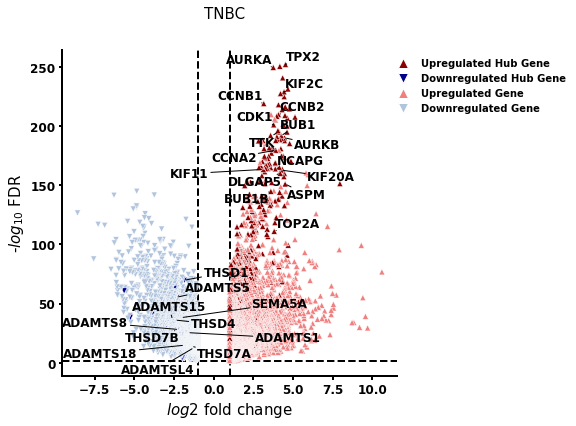

In [245]:
plt.figure(figsize = (6,6))
ax_tnbc = sns.scatterplot(
                          data = tnbc_df, x = "log2FoldChange", y = "nlog10", hue = "color",
                          hue_order = ["Upregulated Hub Gene", "Downregulated Hub Gene", 
                                      "Upregulated", "Downregulated"],
                          palette = ["darkred", "darkblue", "lightcoral", "lightsteelblue"],
                          style = "shape", style_order = ["Upregulated", "Downregulated"],
                          markers = ["^", "v"]
                         )
ax_tnbc.axhline(1.3 , zorder = 0, c = "k", lw = 2, ls = "--")
ax_tnbc.axvline(1, zorder = 0, c = "k", lw = 2, ls = "--")
ax_tnbc.axvline(-1, zorder = 0, c = "k", lw = 2, ls = "--")

tnbc_texts = []
tnbc_top = ["CDK1", "CCNB1", "CCNA2", "BUB1", "TOP2A", "AURKB", "KIF11","BUB1B",
            "CCNB2", "NCAPG", "AURKA", "TTK", "ASPM", "KIF2C", "KIF20A", "DLGAP5",
            "TPX2", "ADAMTS1", "ADAMTS5", "THSD7A", "ADAMTSL4", "SEMA5A", "ADAMTS18", "THSD4",
            "ADAMTS8", "THSD1", "ADAMTS15", "THSD7B"]

for i in tnbc_top:
    j = tnbc_df[tnbc_df["external_gene_name"] == i].index.tolist()
    tnbc_texts.append(plt.text(x = tnbc_df.iloc[j[0]].log2FoldChange,
                      y = tnbc_df.iloc[j[0]].nlog10,
                      s = tnbc_df.iloc[j[0]].external_gene_name,
                      fontsize = 12, weight = "bold"))
    
adjust_text(tnbc_texts, arrowprops = dict(arrowstyle = "-", color = "k"))

tnbc_legend_elements = [Line2D([0], [0], marker="^", color="w", label="Upregulated Hub Gene",
                        markerfacecolor= "darkred", markersize=10),
                        Line2D([0], [0], marker="v", color="w", label="Downregulated Hub Gene",
                        markerfacecolor= "darkblue", markersize=10),
                        Line2D([0], [0], marker="^", color="w", label="Upregulated Gene",
                        markerfacecolor= "lightcoral" , markersize=10),
                        Line2D([0], [0], marker="v", color="w", label="Downregulated Gene",
                        markerfacecolor= "lightsteelblue", markersize=10)]

plt.legend(handles = tnbc_legend_elements, loc = 1,
           bbox_to_anchor = (1.53,1), frameon = False, prop = {"weight":"bold"})

for axis in ["bottom", "left"]:
    ax_tnbc.spines[axis].set_linewidth(2)
ax_tnbc.spines["top"].set_visible(False)
ax_tnbc.spines["right"].set_visible(False)  

ax_tnbc.tick_params(width = 2)

plt.xticks(size = 12, weight = "bold")
plt.yticks(size = 12, weight = "bold")

plt.xlabel("$log {2}$ fold change", size = 15)
plt.ylabel("-$log_{10}$ FDR", size = 15)

plt.suptitle("TNBC", size = 15)
plt.savefig("volcano_tnbc.pdf", bbox_inches = "tight")

In [246]:
# Volcano Plot for BL1
bl1_df = pd.read_csv("BL1_sigs.csv")
bl1_df["nlog10"] = -np.log10(bl1_df.padj)
bl1_df.head()

,ensembl_gene_id,external_gene_name,gene_biotype,chromosome_name,start_position,end_position,baseMean,log2FoldChange,lfcSE,pvalue,padj,nlog10
0,ENSG00000198930,CSAG1,protein_coding,X,152727484.0,152733735.0,137.161545,10.096043,0.766075,8.160000e-44,2.270000e-42,41.643974
1,ENSG00000275216,LINC03061,lncRNA,13,109269634.0,109278512.0,391.356215,9.863618,0.831191,1.580000e-36,2.930000e-35,34.533132
2,ENSG00000117148,ACTL8,protein_coding,1,17755333.0,17827063.0,601.211619,9.668698,0.587558,1.170000e-64,8.190000e-63,62.086716
3,ENSG00000197172,MAGEA6,protein_coding,X,152766136.0,152769716.0,324.445521,9.531939,1.027481,1.830000e-24,1.630000e-23,22.787812
4,ENSG00000213401,MAGEA12,protein_coding,X,152733757.0,152737669.0,145.667119,9.329789,1.241324,5.620000e-18,3.280000e-17,16.484126


In [247]:
def map_color(a):
    log2FoldChange, external_gene_name, nlog10 = a
    
    if external_gene_name in list(bl1_up):
        return "Upregulated Hub Gene"
    if external_gene_name in list(bl1_down):
        return "Downregulated Hub Gene"
    if log2FoldChange > 1:
        return "Upregulated"
    if log2FoldChange < -1:
        return "Downregulated"


bl1_df["color"] = bl1_df[["log2FoldChange", "external_gene_name", "nlog10"]].apply(map_color, axis = 1)  
bl1_df.head()

,ensembl_gene_id,external_gene_name,gene_biotype,chromosome_name,start_position,end_position,baseMean,log2FoldChange,lfcSE,pvalue,padj,nlog10,color
0,ENSG00000198930,CSAG1,protein_coding,X,152727484.0,152733735.0,137.161545,10.096043,0.766075,8.160000e-44,2.270000e-42,41.643974,Upregulated
1,ENSG00000275216,LINC03061,lncRNA,13,109269634.0,109278512.0,391.356215,9.863618,0.831191,1.580000e-36,2.930000e-35,34.533132,Upregulated
2,ENSG00000117148,ACTL8,protein_coding,1,17755333.0,17827063.0,601.211619,9.668698,0.587558,1.170000e-64,8.190000e-63,62.086716,Upregulated
3,ENSG00000197172,MAGEA6,protein_coding,X,152766136.0,152769716.0,324.445521,9.531939,1.027481,1.830000e-24,1.630000e-23,22.787812,Upregulated
4,ENSG00000213401,MAGEA12,protein_coding,X,152733757.0,152737669.0,145.667119,9.329789,1.241324,5.620000e-18,3.280000e-17,16.484126,Upregulated


In [248]:
def map_shape(a):
    log2FoldChange, external_gene_name, nlog10 = a
    
    if external_gene_name in list(bl1_up_only):
        return "BL1 Specific Upregulated Hub Gene"
    if external_gene_name in list(bl1_down_only):
        return "BL1 Specific Downregulated Hub Gene"
    if log2FoldChange > 1:
        return "Upregulated"
    if log2FoldChange < -1:
        return "Downregulated"

bl1_df["shape"] = bl1_df[["log2FoldChange", "external_gene_name", "nlog10"]].apply(map_shape, axis = 1)  
bl1_df.head()

,ensembl_gene_id,external_gene_name,gene_biotype,chromosome_name,start_position,end_position,baseMean,log2FoldChange,lfcSE,pvalue,padj,nlog10,color,shape
0,ENSG00000198930,CSAG1,protein_coding,X,152727484.0,152733735.0,137.161545,10.096043,0.766075,8.160000e-44,2.270000e-42,41.643974,Upregulated,Upregulated
1,ENSG00000275216,LINC03061,lncRNA,13,109269634.0,109278512.0,391.356215,9.863618,0.831191,1.580000e-36,2.930000e-35,34.533132,Upregulated,Upregulated
2,ENSG00000117148,ACTL8,protein_coding,1,17755333.0,17827063.0,601.211619,9.668698,0.587558,1.170000e-64,8.190000e-63,62.086716,Upregulated,Upregulated
3,ENSG00000197172,MAGEA6,protein_coding,X,152766136.0,152769716.0,324.445521,9.531939,1.027481,1.830000e-24,1.630000e-23,22.787812,Upregulated,Upregulated
4,ENSG00000213401,MAGEA12,protein_coding,X,152733757.0,152737669.0,145.667119,9.329789,1.241324,5.620000e-18,3.280000e-17,16.484126,Upregulated,Upregulated


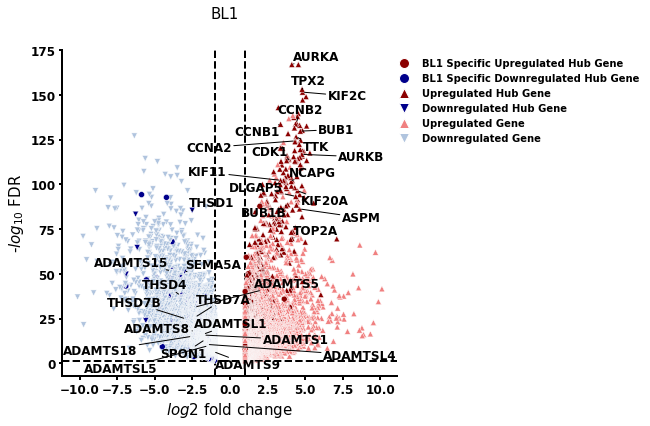

In [252]:
plt.figure(figsize = (6,6))
ax_bl1 = sns.scatterplot(
                          data = bl1_df, x = "log2FoldChange", y = "nlog10", hue = "color",
                          hue_order = ["Upregulated Hub Gene", "Downregulated Hub Gene", 
                                      "Upregulated", "Downregulated"],
                          palette = ["darkred", "darkblue", "lightcoral", "lightsteelblue"],
                          style = "shape", style_order = ["Upregulated", "Downregulated",
                                                         "BL1 Specific Upregulated Hub Gene",
                                                         "BL1 Specific Downregulated Hub Gene"],
                          markers = ["^", "v", "o", "o"]
                         )
ax_bl1.axhline(1.3 , zorder = 0, c = "k", lw = 2, ls = "--")
ax_bl1.axvline(1, zorder = 0, c = "k", lw = 2, ls = "--")
ax_bl1.axvline(-1, zorder = 0, c = "k", lw = 2, ls = "--")

bl1_texts = []
bl1_top = ["BUB1", "DLGAP5", "KIF11", "AURKA", "TPX2", "NCAPG", "CDK1", "CCNA2",
           "KIF2C", "KIF20A", "TOP2A", "CCNB1", "BUB1B", "CCNB2", "AURKB", "TTK",
           "ASPM", "ADAMTS1", "ADAMTS5", "ADAMTSL4", "THSD7A", "SEMA5A", "ADAMTSL5", "THSD4",
           "ADAMTS8", "SPON1", "ADAMTS9", "ADAMTS15", "ADAMTS18", "THSD7B", "THSD1", "ADAMTSL1"]

for i in bl1_top:
    j = bl1_df[bl1_df["external_gene_name"] == i].index.tolist()
    bl1_texts.append(plt.text(x = bl1_df.iloc[j[0]].log2FoldChange,
                      y = bl1_df.iloc[j[0]].nlog10,
                      s = bl1_df.iloc[j[0]].external_gene_name,
                      fontsize = 12, weight = "bold"))
    
adjust_text(bl1_texts, arrowprops = dict(arrowstyle = "-", color = "k"))

bl1_legend_elements = [Line2D([0], [0], marker="o", color="w", label="BL1 Specific Upregulated Hub Gene",
                        markerfacecolor= "darkred", markersize=10),
                        Line2D([0], [0], marker="o", color="w", label="BL1 Specific Downregulated Hub Gene",
                        markerfacecolor= "darkblue", markersize=10),
                        Line2D([0], [0], marker="^", color="w", label="Upregulated Hub Gene",
                        markerfacecolor= "darkred", markersize=10),
                        Line2D([0], [0], marker="v", color="w", label="Downregulated Hub Gene",
                        markerfacecolor= "darkblue", markersize=10),
                        Line2D([0], [0], marker="^", color="w", label="Upregulated Gene",
                        markerfacecolor= "lightcoral" , markersize=10),
                        Line2D([0], [0], marker="v", color="w", label="Downregulated Gene",
                        markerfacecolor= "lightsteelblue", markersize=10)]

plt.legend(handles = bl1_legend_elements, loc = 1,
           bbox_to_anchor = (1.75,1), frameon = False, prop = {"weight":"bold"})

for axis in ["bottom", "left"]:
    ax_bl1.spines[axis].set_linewidth(2)
ax_bl1.spines["top"].set_visible(False)
ax_bl1.spines["right"].set_visible(False)  

ax_bl1.tick_params(width = 2)

plt.xticks(size = 12, weight = "bold")
plt.yticks(size = 12, weight = "bold")

plt.xlabel("$log {2}$ fold change", size = 15)
plt.ylabel("-$log_{10}$ FDR", size = 15)

plt.suptitle("BL1", size = 15)
plt.savefig("volcano_bl1.pdf", bbox_inches = "tight")

In [253]:
# Volcano Plot for BL2
bl2_df = pd.read_csv("BL2_sigs.csv")
bl2_df["nlog10"] = -np.log10(bl2_df.padj)
bl2_df.head()

,ensembl_gene_id,external_gene_name,gene_biotype,chromosome_name,start_position,end_position,baseMean,log2FoldChange,lfcSE,pvalue,padj,nlog10
0,ENSG00000198930,CSAG1,protein_coding,X,152727484.0,152733735.0,137.161545,12.146524,0.938207,4.440000e-45,5.580000e-43,42.253366
1,ENSG00000213401,MAGEA12,protein_coding,X,152733757.0,152737669.0,145.667119,10.240139,1.576589,4.070000e-16,4.360000e-15,14.360514
2,ENSG00000196611,MMP1,protein_coding,11,102789401.0,102798160.0,2574.562996,9.234839,0.480883,1.940000e-86,5.800000e-83,82.236572
3,ENSG00000197172,MAGEA6,protein_coding,X,152766136.0,152769716.0,324.445521,8.934301,1.258140,4.540000e-17,5.430000e-16,15.265200
4,ENSG00000221867,MAGEA3,protein_coding,X,152698767.0,152702347.0,384.186295,8.405506,1.247313,1.090000e-15,1.110000e-14,13.954677


In [254]:
def map_color(a):
    log2FoldChange, external_gene_name, nlog10 = a
    
    if external_gene_name in list(bl2_up):
        return "Upregulated Hub Gene"
    if external_gene_name in list(bl2_down):
        return "Downregulated Hub Gene"
    if log2FoldChange > 1:
        return "Upregulated"
    if log2FoldChange < -1:
        return "Downregulated"


bl2_df["color"] = bl2_df[["log2FoldChange", "external_gene_name", "nlog10"]].apply(map_color, axis = 1)  
bl2_df.head()

,ensembl_gene_id,external_gene_name,gene_biotype,chromosome_name,start_position,end_position,baseMean,log2FoldChange,lfcSE,pvalue,padj,nlog10,color
0,ENSG00000198930,CSAG1,protein_coding,X,152727484.0,152733735.0,137.161545,12.146524,0.938207,4.440000e-45,5.580000e-43,42.253366,Upregulated
1,ENSG00000213401,MAGEA12,protein_coding,X,152733757.0,152737669.0,145.667119,10.240139,1.576589,4.070000e-16,4.360000e-15,14.360514,Upregulated
2,ENSG00000196611,MMP1,protein_coding,11,102789401.0,102798160.0,2574.562996,9.234839,0.480883,1.940000e-86,5.800000e-83,82.236572,Upregulated Hub Gene
3,ENSG00000197172,MAGEA6,protein_coding,X,152766136.0,152769716.0,324.445521,8.934301,1.258140,4.540000e-17,5.430000e-16,15.265200,Upregulated
4,ENSG00000221867,MAGEA3,protein_coding,X,152698767.0,152702347.0,384.186295,8.405506,1.247313,1.090000e-15,1.110000e-14,13.954677,Upregulated


In [256]:
def map_shape(a):
    log2FoldChange, external_gene_name, nlog10 = a
    
    if external_gene_name in list(bl2_up_only):
        return "BL2 Specific Upregulated Hub Gene"
    if external_gene_name in list(bl2_down_only):
        return "BL2 Specific Downregulated Hub Gene"
    if log2FoldChange > 1:
        return "Upregulated"
    if log2FoldChange < -1:
        return "Downregulated"

bl2_df["shape"] = bl2_df[["log2FoldChange", "external_gene_name", "nlog10"]].apply(map_shape, axis = 1)  
bl2_df.head()

,ensembl_gene_id,external_gene_name,gene_biotype,chromosome_name,start_position,end_position,baseMean,log2FoldChange,lfcSE,pvalue,padj,nlog10,color,shape
0,ENSG00000198930,CSAG1,protein_coding,X,152727484.0,152733735.0,137.161545,12.146524,0.938207,4.440000e-45,5.580000e-43,42.253366,Upregulated,Upregulated
1,ENSG00000213401,MAGEA12,protein_coding,X,152733757.0,152737669.0,145.667119,10.240139,1.576589,4.070000e-16,4.360000e-15,14.360514,Upregulated,Upregulated
2,ENSG00000196611,MMP1,protein_coding,11,102789401.0,102798160.0,2574.562996,9.234839,0.480883,1.940000e-86,5.800000e-83,82.236572,Upregulated Hub Gene,Upregulated
3,ENSG00000197172,MAGEA6,protein_coding,X,152766136.0,152769716.0,324.445521,8.934301,1.258140,4.540000e-17,5.430000e-16,15.265200,Upregulated,Upregulated
4,ENSG00000221867,MAGEA3,protein_coding,X,152698767.0,152702347.0,384.186295,8.405506,1.247313,1.090000e-15,1.110000e-14,13.954677,Upregulated,Upregulated


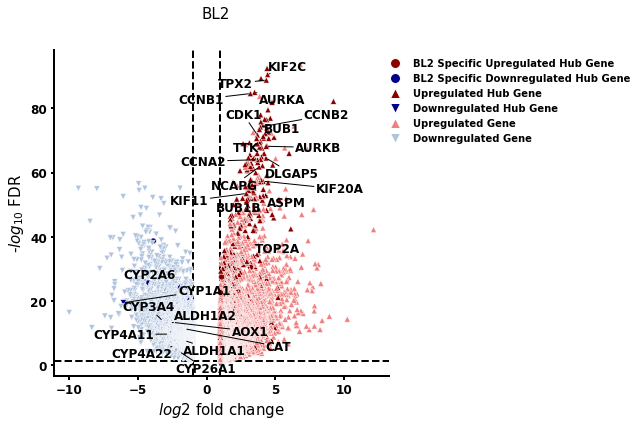

In [259]:
plt.figure(figsize = (6,6))
ax_bl2 = sns.scatterplot(
                          data = bl2_df, x = "log2FoldChange", y = "nlog10", hue = "color",
                          hue_order = ["Upregulated Hub Gene", "Downregulated Hub Gene", 
                                      "Upregulated", "Downregulated"],
                          palette = ["darkred", "darkblue", "lightcoral", "lightsteelblue"],
                          style = "shape", style_order = ["Upregulated", "Downregulated",
                                                         "BL2 Specific Upregulated Hub Gene",
                                                         "BL2 Specific Downregulated Hub Gene"],
                          markers = ["^", "v", "o", "o"]
                         )
ax_bl2.axhline(1.3 , zorder = 0, c = "k", lw = 2, ls = "--")
ax_bl2.axvline(1, zorder = 0, c = "k", lw = 2, ls = "--")
ax_bl2.axvline(-1, zorder = 0, c = "k", lw = 2, ls = "--")

bl2_texts = []
bl2_top = ["CDK1", "KIF20A", "TOP2A", "CCNB1", "BUB1B", "CCNB2", "AURKB", "TTK",
           "ASPM", "BUB1", "DLGAP5", "KIF11", "AURKA", "TPX2", "KIF2C", "CCNA2",
           "NCAPG", "AOX1", "CYP3A4", "CYP1A1", "CYP2A6", "CYP4A11", "CYP4A22", "CYP26A1",
           "ALDH1A1", "ALDH1A2", "CAT"]

for i in bl2_top:
    j = bl2_df[bl2_df["external_gene_name"] == i].index.tolist()
    bl2_texts.append(plt.text(x = bl2_df.iloc[j[0]].log2FoldChange,
                      y = bl2_df.iloc[j[0]].nlog10,
                      s = bl2_df.iloc[j[0]].external_gene_name,
                      fontsize = 12, weight = "bold"))
    
adjust_text(bl2_texts, arrowprops = dict(arrowstyle = "-", color = "k"))

bl2_legend_elements = [Line2D([0], [0], marker="o", color="w", label="BL2 Specific Upregulated Hub Gene",
                        markerfacecolor= "darkred", markersize=10),
                        Line2D([0], [0], marker="o", color="w", label="BL2 Specific Downregulated Hub Gene",
                        markerfacecolor= "darkblue", markersize=10),
                        Line2D([0], [0], marker="^", color="w", label="Upregulated Hub Gene",
                        markerfacecolor= "darkred", markersize=10),
                        Line2D([0], [0], marker="v", color="w", label="Downregulated Hub Gene",
                        markerfacecolor= "darkblue", markersize=10),
                        Line2D([0], [0], marker="^", color="w", label="Upregulated Gene",
                        markerfacecolor= "lightcoral" , markersize=10),
                        Line2D([0], [0], marker="v", color="w", label="Downregulated Gene",
                        markerfacecolor= "lightsteelblue", markersize=10)]

plt.legend(handles = bl2_legend_elements, loc = 1,
           bbox_to_anchor = (1.75,1), frameon = False, prop = {"weight":"bold"})

for axis in ["bottom", "left"]:
    ax_bl2.spines[axis].set_linewidth(2)
ax_bl2.spines["top"].set_visible(False)
ax_bl2.spines["right"].set_visible(False)  

ax_bl2.tick_params(width = 2)

plt.xticks(size = 12, weight = "bold")
plt.yticks(size = 12, weight = "bold")

plt.xlabel("$log {2}$ fold change", size = 15)
plt.ylabel("-$log_{10}$ FDR", size = 15)

plt.suptitle("BL2", size = 15)
plt.savefig("volcano_bl2.pdf", bbox_inches = "tight")

In [260]:
# Volcano Plot for M
m_df = pd.read_csv("M_sigs.csv")
m_df["nlog10"] = -np.log10(m_df.padj)
m_df.head()

,ensembl_gene_id,external_gene_name,gene_biotype,chromosome_name,start_position,end_position,baseMean,log2FoldChange,lfcSE,pvalue,padj,nlog10
0,ENSG00000198930,CSAG1,protein_coding,X,152727484.0,152733735.0,137.161545,10.026140,0.862764,5.590000e-36,2.180000e-34,33.661544
1,ENSG00000117148,ACTL8,protein_coding,1,17755333.0,17827063.0,601.211619,9.089836,0.655299,2.480000e-47,1.940000e-45,44.712198
2,ENSG00000275216,LINC03061,lncRNA,13,109269634.0,109278512.0,391.356215,9.081436,0.929929,2.840000e-26,5.630000e-25,24.249492
3,ENSG00000130287,NCAN,protein_coding,19,19211958.0,19252233.0,983.475612,8.928827,0.640526,1.290000e-47,1.020000e-45,44.991400
4,ENSG00000228295,LINC00392,lncRNA,13,73564244.0,73588070.0,40.611369,8.835270,1.165410,6.580000e-18,6.300000e-17,16.200659


In [261]:
def map_color(a):
    log2FoldChange, external_gene_name, nlog10 = a
    
    if external_gene_name in list(m_up):
        return "Upregulated Hub Gene"
    if external_gene_name in list(m_down):
        return "Downregulated Hub Gene"
    if log2FoldChange > 1:
        return "Upregulated"
    if log2FoldChange < -1:
        return "Downregulated"


m_df["color"] = m_df[["log2FoldChange", "external_gene_name", "nlog10"]].apply(map_color, axis = 1)  
m_df.head()

,ensembl_gene_id,external_gene_name,gene_biotype,chromosome_name,start_position,end_position,baseMean,log2FoldChange,lfcSE,pvalue,padj,nlog10,color
0,ENSG00000198930,CSAG1,protein_coding,X,152727484.0,152733735.0,137.161545,10.026140,0.862764,5.590000e-36,2.180000e-34,33.661544,Upregulated
1,ENSG00000117148,ACTL8,protein_coding,1,17755333.0,17827063.0,601.211619,9.089836,0.655299,2.480000e-47,1.940000e-45,44.712198,Upregulated
2,ENSG00000275216,LINC03061,lncRNA,13,109269634.0,109278512.0,391.356215,9.081436,0.929929,2.840000e-26,5.630000e-25,24.249492,Upregulated
3,ENSG00000130287,NCAN,protein_coding,19,19211958.0,19252233.0,983.475612,8.928827,0.640526,1.290000e-47,1.020000e-45,44.991400,Upregulated
4,ENSG00000228295,LINC00392,lncRNA,13,73564244.0,73588070.0,40.611369,8.835270,1.165410,6.580000e-18,6.300000e-17,16.200659,Upregulated


In [262]:
def map_shape(a):
    log2FoldChange, external_gene_name, nlog10 = a
    
    if external_gene_name in list(m_up_only):
        return "M Specific Upregulated Hub Gene"
    if external_gene_name in list(m_down_only):
        return "M Specific Downregulated Hub Gene"
    if log2FoldChange > 1:
        return "Upregulated"
    if log2FoldChange < -1:
        return "Downregulated"

m_df["shape"] = m_df[["log2FoldChange", "external_gene_name", "nlog10"]].apply(map_shape, axis = 1)  
m_df.head()

,ensembl_gene_id,external_gene_name,gene_biotype,chromosome_name,start_position,end_position,baseMean,log2FoldChange,lfcSE,pvalue,padj,nlog10,color,shape
0,ENSG00000198930,CSAG1,protein_coding,X,152727484.0,152733735.0,137.161545,10.026140,0.862764,5.590000e-36,2.180000e-34,33.661544,Upregulated,Upregulated
1,ENSG00000117148,ACTL8,protein_coding,1,17755333.0,17827063.0,601.211619,9.089836,0.655299,2.480000e-47,1.940000e-45,44.712198,Upregulated,Upregulated
2,ENSG00000275216,LINC03061,lncRNA,13,109269634.0,109278512.0,391.356215,9.081436,0.929929,2.840000e-26,5.630000e-25,24.249492,Upregulated,Upregulated
3,ENSG00000130287,NCAN,protein_coding,19,19211958.0,19252233.0,983.475612,8.928827,0.640526,1.290000e-47,1.020000e-45,44.991400,Upregulated,Upregulated
4,ENSG00000228295,LINC00392,lncRNA,13,73564244.0,73588070.0,40.611369,8.835270,1.165410,6.580000e-18,6.300000e-17,16.200659,Upregulated,Upregulated


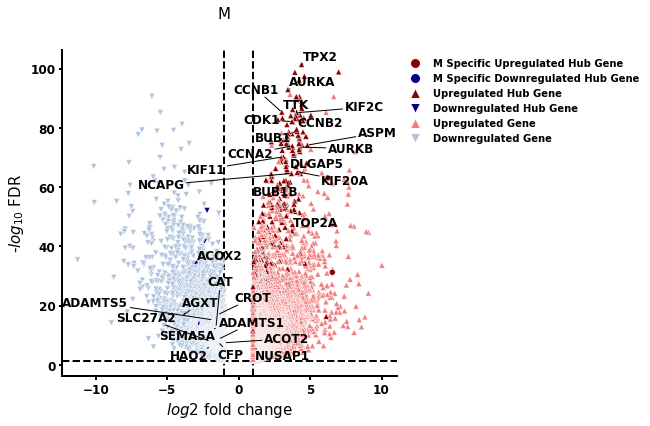

In [264]:
plt.figure(figsize = (6,6))
ax_m = sns.scatterplot(
                          data = m_df, x = "log2FoldChange", y = "nlog10", hue = "color",
                          hue_order = ["Upregulated Hub Gene", "Downregulated Hub Gene", 
                                      "Upregulated", "Downregulated"],
                          palette = ["darkred", "darkblue", "lightcoral", "lightsteelblue"],
                          style = "shape", style_order = ["Upregulated", "Downregulated",
                                                         "M Specific Upregulated Hub Gene",
                                                         "M Specific Downregulated Hub Gene"],
                          markers = ["^", "v", "o", "o"]
                         )
ax_m.axhline(1.3 , zorder = 0, c = "k", lw = 2, ls = "--")
ax_m.axvline(1, zorder = 0, c = "k", lw = 2, ls = "--")
ax_m.axvline(-1, zorder = 0, c = "k", lw = 2, ls = "--")

m_texts = []
m_top = ["NCAPG", "AURKB", "CDK1", "AURKA", "KIF11", "TTK", "CCNB1", "TPX2",
         "ASPM", "CCNB2", "BUB1", "CCNA2", "DLGAP5", "TOP2A", "NUSAP1", "KIF2C",
         "BUB1B", "KIF20A", "CFP", "CAT", "AGXT", "SLC27A2", "ACOT2", "ACOX2",
         "ADAMTS1", "CROT", "SEMA5A", "ADAMTS5", "HAO2"]

for i in m_top:
    j = m_df[m_df["external_gene_name"] == i].index.tolist()
    m_texts.append(plt.text(x = m_df.iloc[j[0]].log2FoldChange,
                      y = m_df.iloc[j[0]].nlog10,
                      s = m_df.iloc[j[0]].external_gene_name,
                      fontsize = 12, weight = "bold"))
    
adjust_text(m_texts, arrowprops = dict(arrowstyle = "-", color = "k"))

m_legend_elements = [Line2D([0], [0], marker="o", color="w", label="M Specific Upregulated Hub Gene",
                        markerfacecolor= "darkred", markersize=10),
                        Line2D([0], [0], marker="o", color="w", label="M Specific Downregulated Hub Gene",
                        markerfacecolor= "darkblue", markersize=10),
                        Line2D([0], [0], marker="^", color="w", label="Upregulated Hub Gene",
                        markerfacecolor= "darkred", markersize=10),
                        Line2D([0], [0], marker="v", color="w", label="Downregulated Hub Gene",
                        markerfacecolor= "darkblue", markersize=10),
                        Line2D([0], [0], marker="^", color="w", label="Upregulated Gene",
                        markerfacecolor= "lightcoral" , markersize=10),
                        Line2D([0], [0], marker="v", color="w", label="Downregulated Gene",
                        markerfacecolor= "lightsteelblue", markersize=10)]

plt.legend(handles = m_legend_elements, loc = 1,
           bbox_to_anchor = (1.75,1), frameon = False, prop = {"weight":"bold"})

for axis in ["bottom", "left"]:
    ax_m.spines[axis].set_linewidth(2)
ax_m.spines["top"].set_visible(False)
ax_m.spines["right"].set_visible(False)  

ax_m.tick_params(width = 2)

plt.xticks(size = 12, weight = "bold")
plt.yticks(size = 12, weight = "bold")

plt.xlabel("$log {2}$ fold change", size = 15)
plt.ylabel("-$log_{10}$ FDR", size = 15)

plt.suptitle("M", size = 15)
plt.savefig("volcano_m.pdf", bbox_inches = "tight")

In [265]:
# Volcano Plot for LAR
lar_df = pd.read_csv("LAR_sigs.csv")
lar_df["nlog10"] = -np.log10(lar_df.padj)
lar_df.head()

,ensembl_gene_id,external_gene_name,gene_biotype,chromosome_name,start_position,end_position,baseMean,log2FoldChange,lfcSE,pvalue,padj,nlog10
0,ENSG00000178597,PSAPL1,protein_coding,4,7430285,7434930,90.425547,10.264391,0.983723,1.050000e-29,8.520000e-28,27.069560
1,ENSG00000105141,CASP14,protein_coding,19,15049480,15058293,3417.191999,9.483723,0.724017,3.140000e-43,6.260000e-41,40.203426
2,ENSG00000117148,ACTL8,protein_coding,1,17755333,17827063,601.211619,9.466719,0.732982,3.460000e-42,6.330000e-40,39.198596
3,ENSG00000198930,CSAG1,protein_coding,X,152727484,152733735,137.161545,9.437821,0.953548,3.300000e-27,2.120000e-25,24.673664
4,ENSG00000197172,MAGEA6,protein_coding,X,152766136,152769716,324.445521,9.129220,1.303046,1.430000e-16,2.560000e-15,14.591760


In [266]:
def map_color(a):
    log2FoldChange, external_gene_name, nlog10 = a
    
    if external_gene_name in list(lar_up):
        return "Upregulated Hub Gene"
    if external_gene_name in list(lar_down):
        return "Downregulated Hub Gene"
    if log2FoldChange > 1:
        return "Upregulated"
    if log2FoldChange < -1:
        return "Downregulated"


lar_df["color"] = lar_df[["log2FoldChange", "external_gene_name", "nlog10"]].apply(map_color, axis = 1)  
lar_df.head()

,ensembl_gene_id,external_gene_name,gene_biotype,chromosome_name,start_position,end_position,baseMean,log2FoldChange,lfcSE,pvalue,padj,nlog10,color
0,ENSG00000178597,PSAPL1,protein_coding,4,7430285,7434930,90.425547,10.264391,0.983723,1.050000e-29,8.520000e-28,27.069560,Upregulated
1,ENSG00000105141,CASP14,protein_coding,19,15049480,15058293,3417.191999,9.483723,0.724017,3.140000e-43,6.260000e-41,40.203426,Upregulated
2,ENSG00000117148,ACTL8,protein_coding,1,17755333,17827063,601.211619,9.466719,0.732982,3.460000e-42,6.330000e-40,39.198596,Upregulated
3,ENSG00000198930,CSAG1,protein_coding,X,152727484,152733735,137.161545,9.437821,0.953548,3.300000e-27,2.120000e-25,24.673664,Upregulated
4,ENSG00000197172,MAGEA6,protein_coding,X,152766136,152769716,324.445521,9.129220,1.303046,1.430000e-16,2.560000e-15,14.591760,Upregulated


In [267]:
def map_shape(a):
    log2FoldChange, external_gene_name, nlog10 = a
    
    if external_gene_name in list(lar_up_only):
        return "LAR Specific Upregulated Hub Gene"
    if external_gene_name in list(lar_down_only):
        return "LAR Specific Downregulated Hub Gene"
    if log2FoldChange > 1:
        return "Upregulated"
    if log2FoldChange < -1:
        return "Downregulated"

lar_df["shape"] = lar_df[["log2FoldChange", "external_gene_name", "nlog10"]].apply(map_shape, axis = 1)  
lar_df.head()

,ensembl_gene_id,external_gene_name,gene_biotype,chromosome_name,start_position,end_position,baseMean,log2FoldChange,lfcSE,pvalue,padj,nlog10,color,shape
0,ENSG00000178597,PSAPL1,protein_coding,4,7430285,7434930,90.425547,10.264391,0.983723,1.050000e-29,8.520000e-28,27.069560,Upregulated,Upregulated
1,ENSG00000105141,CASP14,protein_coding,19,15049480,15058293,3417.191999,9.483723,0.724017,3.140000e-43,6.260000e-41,40.203426,Upregulated,Upregulated
2,ENSG00000117148,ACTL8,protein_coding,1,17755333,17827063,601.211619,9.466719,0.732982,3.460000e-42,6.330000e-40,39.198596,Upregulated,Upregulated
3,ENSG00000198930,CSAG1,protein_coding,X,152727484,152733735,137.161545,9.437821,0.953548,3.300000e-27,2.120000e-25,24.673664,Upregulated,Upregulated
4,ENSG00000197172,MAGEA6,protein_coding,X,152766136,152769716,324.445521,9.129220,1.303046,1.430000e-16,2.560000e-15,14.591760,Upregulated,Upregulated


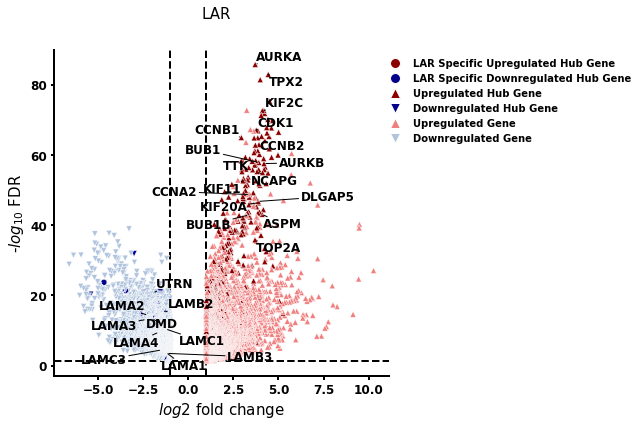

In [268]:
plt.figure(figsize = (6,6))
ax_lar = sns.scatterplot(
                          data = lar_df, x = "log2FoldChange", y = "nlog10", hue = "color",
                          hue_order = ["Upregulated Hub Gene", "Downregulated Hub Gene", 
                                      "Upregulated", "Downregulated"],
                          palette = ["darkred", "darkblue", "lightcoral", "lightsteelblue"],
                          style = "shape", style_order = ["Upregulated", "Downregulated",
                                                         "LAR Specific Upregulated Hub Gene",
                                                         "LAR Specific Downregulated Hub Gene"],
                          markers = ["^", "v", "o", "o"]
                         )
ax_lar.axhline(1.3 , zorder = 0, c = "k", lw = 2, ls = "--")
ax_lar.axvline(1, zorder = 0, c = "k", lw = 2, ls = "--")
ax_lar.axvline(-1, zorder = 0, c = "k", lw = 2, ls = "--")

lar_texts = []
lar_top = ["TOP2A", "DLGAP5", "AURKA", "ASPM", "NCAPG", "KIF20A", "CDK1", "BUB1",
           "KIF11", "CCNB2", "BUB1B", "CCNA2", "TPX2", "KIF2C", "AURKB", "TTK",
           "CCNB1", "LAMA1", "LAMA2", "LAMA4", "LAMC1", "LAMA3", "LAMB2", "LAMC3",
           "DMD", "LAMB3", "UTRN"]
    
for i in lar_top:
    j = lar_df[lar_df["external_gene_name"] == i].index.tolist()
    lar_texts.append(plt.text(x = lar_df.iloc[j[0]].log2FoldChange,
                      y = lar_df.iloc[j[0]].nlog10,
                      s = lar_df.iloc[j[0]].external_gene_name,
                      fontsize = 12, weight = "bold"))
    
adjust_text(lar_texts, arrowprops = dict(arrowstyle = "-", color = "k"))

lar_legend_elements = [Line2D([0], [0], marker="o", color="w", label="LAR Specific Upregulated Hub Gene",
                        markerfacecolor= "darkred", markersize=10),
                        Line2D([0], [0], marker="o", color="w", label="LAR Specific Downregulated Hub Gene",
                        markerfacecolor= "darkblue", markersize=10),
                        Line2D([0], [0], marker="^", color="w", label="Upregulated Hub Gene",
                        markerfacecolor= "darkred", markersize=10),
                        Line2D([0], [0], marker="v", color="w", label="Downregulated Hub Gene",
                        markerfacecolor= "darkblue", markersize=10),
                        Line2D([0], [0], marker="^", color="w", label="Upregulated Gene",
                        markerfacecolor= "lightcoral" , markersize=10),
                        Line2D([0], [0], marker="v", color="w", label="Downregulated Gene",
                        markerfacecolor= "lightsteelblue", markersize=10)]

plt.legend(handles = lar_legend_elements, loc = 1,
           bbox_to_anchor = (1.75,1), frameon = False, prop = {"weight":"bold"})

for axis in ["bottom", "left"]:
    ax_lar.spines[axis].set_linewidth(2)
ax_lar.spines["top"].set_visible(False)
ax_lar.spines["right"].set_visible(False)  

ax_lar.tick_params(width = 2)

plt.xticks(size = 12, weight = "bold")
plt.yticks(size = 12, weight = "bold")

plt.xlabel("$log {2}$ fold change", size = 15)
plt.ylabel("-$log_{10}$ FDR", size = 15)

plt.suptitle("LAR", size = 15)
plt.savefig("volcano_lar.pdf", bbox_inches = "tight")

In [5]:
# Drugs
tnbc_drugs = pd.read_table("tnbc.tsv")
tnbc_drugs = set(tnbc_drugs["Perturbation"])

bl1_drugs = pd.read_table("bl1.tsv")
bl1_drugs = set(bl1_drugs["Perturbation"])

bl2_drugs = pd.read_table("bl2.tsv")
bl2_drugs = set(bl2_drugs["Perturbation"])

m_drugs = pd.read_table("m.tsv")
m_drugs = set(m_drugs["Perturbation"])

lar_drugs = pd.read_table("lar.tsv")
lar_drugs = set(lar_drugs["Perturbation"])

In [6]:
# Preparing drugs for UpSet plot
drugs = from_contents({"TNBC": tnbc_drugs, "BL1": bl1_drugs, "BL2": bl2_drugs, "M": m_drugs, "LAR": lar_drugs})
drugs

id
TNBC  BL1   BL2   M     LAR                              
True  True  True  True  True     QUINACRINE HYDROCHLORIDE
                        True                BRD-K57080016
                        True                 mitoxantrone
            False False False                    PLX-4032
      False True  False True               curcubitacin I
      True  True  True  True                BRD-K53414658
                        True                   wortmannin
                        True                  CAM-9-027-3
                        True           Tyrphostin AG 1478
                        True                BRD-K65814004
                        True                      MK-0591
      False True  True  True                BRD-K43620258
      True  True  True  True                    dovitinib
            False True  True       GW405833 hydrochloride
            True  True  True                       AG-879
                        True                   NVP-BEZ235
                        True                      MK-2206
                        True                BRD-K68548958
                  False True                   TENIPOSIDE
                  True  True                     Nutlin-3
                  False True                BRD-A34751532
                  True  True                      DL-PDMP
            False True  True    niguldipine hydrochloride
      False True  True  True                BRD-K64642496
      True  True  True  True                   BMS-754807
                        True                     TG101348
                        True                       PP-110
                        True                   BMS-536924
                        True   "Ingenol 3, 20-dibenzoate"
                        True                  palbociclib
                        True                       DG-041
                        True                   BJM-ctd2-9
                        True                      MLN2238
                        True                BRD-K98490050
            False True  True                BRD-K86574132
            True  True  False                        FCCP
      False False False False                    GDC-0941
      True  True  True  True                BRD-K34014345
                        True                BRD-K26664453
      False True  False False                     AZD8055
      True  True  True  True                BRD-K19295594
                        True                BRD-A36630025
False True  False False False                    AS605240
            True  True  True                    Rottlerin
            False False False                thioridazine
      False True  False False                  tremulacin
                        False                  PHA-793887
            False True  True                     CAY10594
                        True                BRD-A62809825
                        False                  SELAMECTIN
                        True                       PF 750

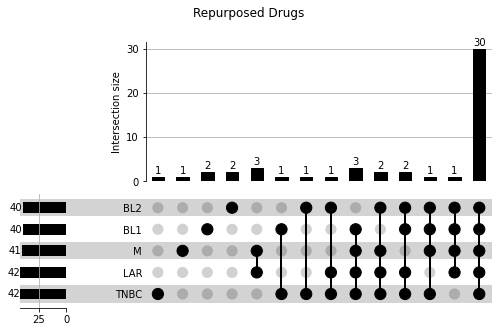

In [7]:
# UpSet plot for drugs
drugs_upset = UpSet(drugs, subset_size="count",
                          show_counts=True, shading_color="lightgray").plot() 
plt.suptitle("Repurposed Drugs")
plt.savefig("drugs_upset.pdf")

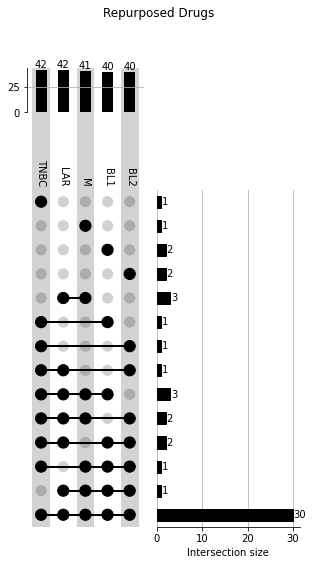

In [8]:
# UpSet vertical plot for drugss
drugs_upset = UpSet(drugs, subset_size="count", orientation='vertical',
                          show_counts=True, shading_color="lightgray").plot() 
plt.suptitle("Repurposed Drugs")
plt.savefig("drugs_vertial_upset.pdf")

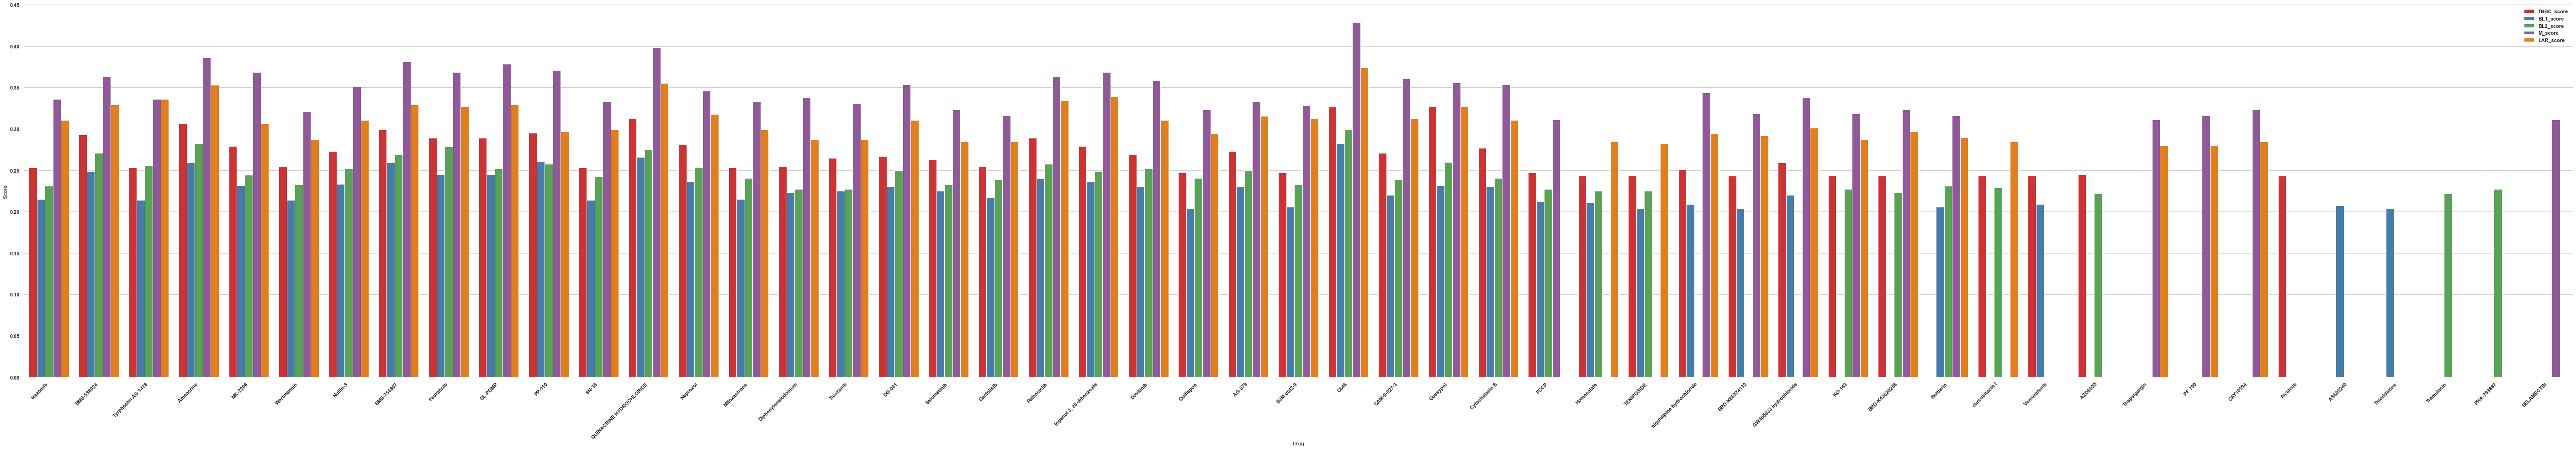

In [165]:
# Drug scores plot

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(100, 15))
# Load the scores dataset
scores = pd.read_csv("scores.csv")
scores = pd.melt(scores, id_vars = "Drug", var_name = "Subtype", value_name = "Score")

# Plot
sns.barplot(x = "Drug", y = "Score", hue = "Subtype", palette = "Set1", data = scores)

# Add a legend and informative axis label
ax.legend(ncol=1, loc= 1, frameon=False, bbox_to_anchor = (1,1), prop = {"weight":"bold"})
sns.despine(left=True, bottom=True)
ax.set(ylim=(0, 0.45), ylabel="Score", xlabel="Drug")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
for tick in ax.get_xticklabels():
    tick.set_fontweight("bold")
for tick in ax.get_yticklabels():
    tick.set_fontweight("bold")
plt.savefig("drug_scores.pdf")
